In [31]:
import pandas as pd

# Loading Lightning Error

In [67]:
lightning_error = pd.read_csv("data/Salesforce/Salesforce/ELF/LightningError/2022-06-06_LightningError.csv")

In [68]:
lightning_error.shape

(7254, 39)

In [69]:
# Remove missing values in any of the following columns 
lightning_error.dropna(subset = ['PAGE_URL']).shape
#lightning_error = [PAGE_URL for PAGE_URL in lightning_error if not(pd.isnull(PAGE_URL)) == True]


(7012, 39)

In [70]:
active_reports = pd.read_csv("datasets/active_reports.csv")


In [71]:
run_report_api_resource = "/lightning/r/"

def get_report_info_from_endpoint(page_url):
    if not(pd.isnull(page_url)) == True: 
        if page_url.startswith(run_report_api_resource):
            uri = page_url.split(run_report_api_resource)
            if len(uri) >= 2:
                report_type, report_id_derived = uri[1].split("/")[:2]
                return report_type, report_id_derived

In [72]:
lightning_error['REPORT_INFO_DERIVED'] = lightning_error.PAGE_URL.apply(get_report_info_from_endpoint)

In [73]:
lightning_error['REPORT_TYPE_DERIVED'] = lightning_error.REPORT_INFO_DERIVED.str[0]
lightning_error['REPORT_ID_DERIVED'] = lightning_error.REPORT_INFO_DERIVED.str[1]

In [74]:
lightning_error.shape

(7254, 42)

In [76]:
ltng_full_reports = pd.merge(left=active_reports, right=lightning_error, left_on="Id", right_on="REPORT_ID_DERIVED")

In [ ]:
## DROP nas colunas que não são interessantes, trocar os dados que são usados pela tabela do merge 

In [77]:
list(ltng_full_reports.columns)

['CreatedById',
 'CreatedDate',
 'Description',
 'DeveloperName',
 'FolderName',
 'Format',
 'Id',
 'IsDeleted',
 'LastModifiedById',
 'LastModifiedDate',
 'LastReferencedDate',
 'LastRunDate',
 'LastViewedDate',
 'Name',
 'NamespacePrefix',
 'OwnerId',
 'ReportTypeApiName',
 'SystemModstamp',
 'EVENT_TYPE_x',
 'TIMESTAMP_x',
 'REQUEST_ID_x',
 'ORGANIZATION_ID_x',
 'USER_ID_x',
 'RUN_TIME',
 'CPU_TIME',
 'URI',
 'SESSION_KEY_x',
 'LOGIN_KEY_x',
 'USER_TYPE_x',
 'REQUEST_STATUS',
 'DB_TOTAL_TIME',
 'ENTITY_NAME',
 'DISPLAY_TYPE',
 'RENDERING_TYPE',
 'REPORT_ID',
 'ROW_COUNT',
 'NUMBER_EXCEPTION_FILTERS',
 'NUMBER_COLUMNS',
 'AVERAGE_ROW_SIZE',
 'SORT',
 'DB_BLOCKS',
 'DB_CPU_TIME',
 'NUMBER_BUCKETS',
 'TIMESTAMP_DERIVED_x',
 'USER_ID_DERIVED_x',
 'CLIENT_IP_x',
 'URI_ID_DERIVED',
 'REPORT_ID_DERIVED_x',
 'ORIGIN',
 'IsActive',
 'EVENT_TYPE_y',
 'TIMESTAMP_y',
 'REQUEST_ID_y',
 'ORGANIZATION_ID_y',
 'USER_ID_y',
 'CLIENT_ID',
 'SESSION_KEY_y',
 'LOGIN_KEY_y',
 'USER_TYPE_y',
 'APP_NAME',

In [5]:
lightning_error.head()

,EVENT_TYPE,TIMESTAMP,REQUEST_ID,ORGANIZATION_ID,USER_ID,CLIENT_ID,SESSION_KEY,LOGIN_KEY,USER_TYPE,APP_NAME,...,UI_EVENT_SEQUENCE_NUM,PAGE_ENTITY_ID,PAGE_ENTITY_TYPE,PAGE_CONTEXT,PAGE_URL,PAGE_APP_NAME,COMPONENT_NAME,TIMESTAMP_DERIVED,USER_ID_DERIVED,CLIENT_IP
0,LightningError,2.022061e+13,TID:37452284900004f8ad,00D0b000000GaMp,0052R000009TqAh,NaN,wS+Etg2GfUXULHt4,VKlOHJaKMaoqtXPd,Standard,one:one,...,NaN,5006P000005FoO5QAK,Case,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005FoO5QAK/view,LightningService,NaN,2022-06-06T00:00:29.202Z,0052R000009TqAhQAK,203.174.168.50
1,LightningError,2.022061e+13,TID:2841596100009bbe6d,00D0b000000GaMp,0050b000004K3sl,NaN,PqGTQXaT73QqrzLP,dCxYGHdJJFKk3/TU,Standard,one:one,...,NaN,NaN,Report,sfa:analyticsHome,/lightning/o/Report/home?queryScope=mru,LightningService,NaN,2022-06-06T00:01:00.152Z,0050b000004K3slAAC,123.177.53.1
2,LightningError,2.022061e+13,TID:63107250000fc45244,00D0b000000GaMp,0050b000004K3sl,NaN,PqGTQXaT73QqrzLP,dCxYGHdJJFKk3/TU,Standard,one:one,...,NaN,NaN,NaN,one:twoColumnLayout,/lightning/settings/personal/LanguageAndTimeZo...,LightningService,NaN,2022-06-06T00:02:21.579Z,0050b000004K3slAAC,123.177.53.1
3,LightningError,2.022061e+13,TID:5526827290000e660b,00D0b000000GaMp,0050b000004KC6E,NaN,ARj3K4yHUY7VPIng,wRQYgMbcasBOCTgW,Standard,one:one,...,NaN,NaN,DispatchPendingApproval__c,force:objectHomeDesktop,/lightning/o/DispatchPendingApproval__c/list?f...,LightningService,NaN,2022-06-06T00:06:22.916Z,0050b000004KC6EAAW,143.166.183.15
4,LightningError,2.022061e+13,TID:8779650000002a70f1,00D0b000000GaMp,0050b000004KC6P,NaN,uLMkDkx1CtMmo6Mo,X0pOky+cVLk4dTLM,Standard,one:one,...,NaN,NaN,DispatchPendingApproval__c,force:objectHomeDesktop,/lightning/o/DispatchPendingApproval__c/list?f...,LightningService,NaN,2022-06-06T00:10:13.952Z,0050b000004KC6PAAW,143.166.183.11


---

## Getting the hours of the day that more erros occurred

Converting ***TIMESTAMP_DERIVED*** from *str* to type *date*

In [6]:
type(lightning_error['TIMESTAMP_DERIVED'][0])

str

In [7]:
import datetime
from datetime import date

lightning_error['TIMESTAMP_DERIVED'] = pd.to_datetime(lightning_error['TIMESTAMP_DERIVED'], infer_datetime_format=True)

In [8]:
type(lightning_error['TIMESTAMP_DERIVED'][0])

pandas._libs.tslibs.timestamps.Timestamp

Getting the hours from ***TIMESTAMP_DERIVED*** column

In [9]:
hour_rows = []

for i in lightning_error.index:
    hour_rows.append(lightning_error['TIMESTAMP_DERIVED'][i].hour)

In [10]:
len(hour_rows)

7254

Creating a column with the hour data

In [11]:
lightning_error['TIMESTAMP_DERIVED_HOUR'] = hour_rows

In [12]:
list(lightning_error.columns)

['EVENT_TYPE',
 'TIMESTAMP',
 'REQUEST_ID',
 'ORGANIZATION_ID',
 'USER_ID',
 'CLIENT_ID',
 'SESSION_KEY',
 'LOGIN_KEY',
 'USER_TYPE',
 'APP_NAME',
 'DEVICE_PLATFORM',
 'SDK_APP_VERSION',
 'OS_NAME',
 'OS_VERSION',
 'USER_AGENT',
 'BROWSER_NAME',
 'BROWSER_VERSION',
 'SDK_VERSION',
 'DEVICE_MODEL',
 'DEVICE_ID',
 'SDK_APP_TYPE',
 'CLIENT_GEO',
 'CONNECTION_TYPE',
 'UI_EVENT_ID',
 'UI_EVENT_TYPE',
 'UI_EVENT_SOURCE',
 'UI_EVENT_TIMESTAMP',
 'PAGE_START_TIME',
 'DEVICE_SESSION_ID',
 'UI_EVENT_SEQUENCE_NUM',
 'PAGE_ENTITY_ID',
 'PAGE_ENTITY_TYPE',
 'PAGE_CONTEXT',
 'PAGE_URL',
 'PAGE_APP_NAME',
 'COMPONENT_NAME',
 'TIMESTAMP_DERIVED',
 'USER_ID_DERIVED',
 'CLIENT_IP',
 'TIMESTAMP_DERIVED_HOUR']

Getting a count of erros by hour

In [13]:
lightning_error_group = lightning_error.groupby(['TIMESTAMP_DERIVED_HOUR']).agg({'UI_EVENT_ID': 'count'})

Renaming the column of ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [14]:
lightning_error_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

In [15]:
lightning_error_group

,UI_EVENT_ID_COUNT
TIMESTAMP_DERIVED_HOUR,
0,161
1,240
2,301
3,222
4,233
5,463
6,500
7,628
8,458


Graph relating the number of errors and the hour of the day

Text(0.5, 1.0, 'Number of erros per time of day')

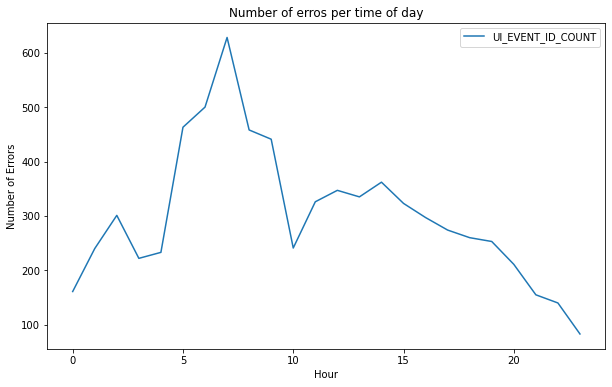

In [16]:
graph = lightning_error_group.plot(figsize=(10, 6))
graph.set_ylabel('Number of Errors')
graph.set_xlabel('Hour')
graph.set_title('Number of erros per time of day')

### Getting the top hours data

Sorting by count

In [17]:
lightning_error_group_sorted = lightning_error_group.sort_values(by=['UI_EVENT_ID_COUNT'], ascending=False)

In [18]:
lightning_error_group_sorted

,UI_EVENT_ID_COUNT
TIMESTAMP_DERIVED_HOUR,
7,628
6,500
5,463
8,458
9,441
14,362
12,347
13,335
11,326


Getting top hours

In [19]:
number_of_top_hours = 5

top_hours = lightning_error_group_sorted.head(number_of_top_hours)

In [20]:
top_hours

,UI_EVENT_ID_COUNT
TIMESTAMP_DERIVED_HOUR,
7,628
6,500
5,463
8,458
9,441


Sorting by hours

In [21]:
top_hours = top_hours.sort_values(by=['TIMESTAMP_DERIVED_HOUR'])

In [22]:
top_hours

,UI_EVENT_ID_COUNT
TIMESTAMP_DERIVED_HOUR,
5,463
6,500
7,628
8,458
9,441


Reseting index

In [23]:
top_hours = top_hours.reset_index()

In [24]:
top_hours

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID_COUNT
0,5,463
1,6,500
2,7,628
3,8,458
4,9,441


Result

In [25]:
top_hours_values = []

print("The top hours are: ", end="")
for i in top_hours.index:
    value = top_hours['TIMESTAMP_DERIVED_HOUR'][i]
    
    top_hours_values.append(value)
    
    if i == len(top_hours) - 1:
        print(f"{value}", end="")
    elif i == len(top_hours) - 2:
        print(f"{value} and ", end="")
    else:
        print(f"{value}, ", end="")

The top hours are: 5, 6, 7, 8 and 9

---

## Analyzing the most common error types by day

Getting the count of erros for each type of error

In [26]:
lightning_error_group = lightning_error.groupby(['UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [27]:
lightning_error_group.shape

(9, 1)

Renaming the column of ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [28]:
lightning_error_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

In [29]:
lightning_error_group

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
AuraError,171
Error,3709
RangeError,218
ReferenceError,1
RequiredAiltnFieldsNotValid,17
SecurityError,1
SyntaxError,12
TypeError,3121
unknown,4


Sorting the data by ***UI_EVENT_ID_COUNT***

In [30]:
lightning_error_group = lightning_error_group.sort_values(by=['UI_EVENT_ID_COUNT'], ascending=False)

In [31]:
lightning_error_group

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,3709
TypeError,3121
RangeError,218
AuraError,171
RequiredAiltnFieldsNotValid,17
SyntaxError,12
unknown,4
ReferenceError,1
SecurityError,1


Viewing the data

Text(0.5, 1.0, 'Types of errors that appear the most during the day')

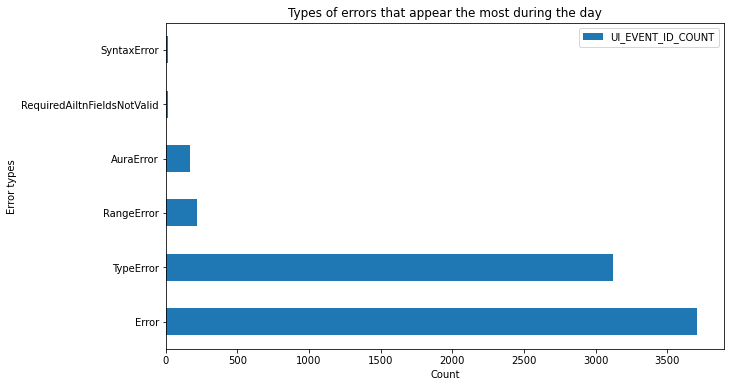

In [32]:
number_of_error_types_graph = 6

graph = lightning_error_group.head(number_of_error_types_graph).plot.barh(figsize=(10, 6))
graph.set_ylabel('Error types')
graph.set_xlabel('Count')
graph.set_title('Types of errors that appear the most during the day')

### Getting top error types by day

In [33]:
number_of_error_types = 5

top_error_types_by_day = lightning_error_group.head(number_of_error_types)

In [34]:
top_error_types_by_day

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,3709
TypeError,3121
RangeError,218
AuraError,171
RequiredAiltnFieldsNotValid,17


Reseting index

In [35]:
top_error_types_by_day = top_error_types_by_day.reset_index()

In [36]:
top_error_types_by_day

,UI_EVENT_SOURCE,UI_EVENT_ID_COUNT
0,Error,3709
1,TypeError,3121
2,RangeError,218
3,AuraError,171
4,RequiredAiltnFieldsNotValid,17


Result

In [37]:
top_error_types_by_day_values = []

print(f"The top {number_of_error_types} error types by day are: ")

for i in top_error_types_by_day.index:
    value = top_error_types_by_day['UI_EVENT_SOURCE'][i]
    
    top_error_types_by_day_values.append(value)
    
    print(f"{i + 1} - {value}")

The top 5 error types by day are: 
1 - Error
2 - TypeError
3 - RangeError
4 - AuraError
5 - RequiredAiltnFieldsNotValid


---

## Analyzing the most common error types by peak time

Getting top hours values

In [38]:
top_hours_values

[5, 6, 7, 8, 9]

Filtering the data by top hours

In [39]:
lightning_error.shape

(7254, 40)

In [40]:
filtered_lightning_error = lightning_error[lightning_error.TIMESTAMP_DERIVED_HOUR.isin(top_hours_values)]

In [41]:
filtered_lightning_error.shape

(2490, 40)

Grouping by ***UI_EVENT_SOURCE***

In [42]:
filtered_lightning_error_group = filtered_lightning_error.groupby(['UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [43]:
filtered_lightning_error_group.shape

(8, 1)

In [44]:
filtered_lightning_error_group

,UI_EVENT_ID
UI_EVENT_SOURCE,
AuraError,148
Error,1940
RangeError,79
ReferenceError,1
RequiredAiltnFieldsNotValid,12
SyntaxError,1
TypeError,307
unknown,2


Renaming the column of ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [45]:
filtered_lightning_error_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

Sorting by ***UI_EVENT_ID_COUNT***

In [46]:
filtered_lightning_error_group_sorted = filtered_lightning_error_group.sort_values(by=['UI_EVENT_ID_COUNT'], ascending=False)

In [47]:
filtered_lightning_error_group_sorted

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,1940
TypeError,307
AuraError,148
RangeError,79
RequiredAiltnFieldsNotValid,12
unknown,2
ReferenceError,1
SyntaxError,1


Viewing the data

Text(0.5, 1.0, 'Types of errors that appear the most during the peak time')

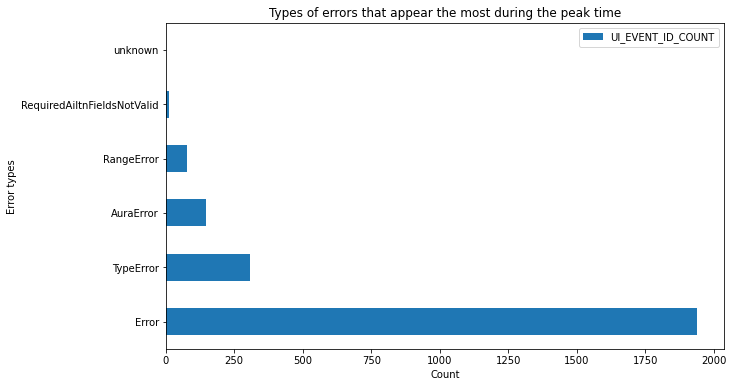

In [48]:
graph = filtered_lightning_error_group_sorted.head(number_of_error_types_graph).plot.barh(figsize=(10, 6))
graph.set_ylabel('Error types')
graph.set_xlabel('Count')
graph.set_title('Types of errors that appear the most during the peak time')

### Getting top error types by peak time

In [49]:
top_error_types_by_peak_time = filtered_lightning_error_group_sorted.head(number_of_error_types)

In [50]:
top_error_types_by_peak_time

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,1940
TypeError,307
AuraError,148
RangeError,79
RequiredAiltnFieldsNotValid,12


Reseting index

In [51]:
top_error_types_by_peak_time = top_error_types_by_peak_time.reset_index()

Getting top page entity type values and showing result

In [52]:
top_error_types_by_peak_time_values = []

print(f"The top {number_of_error_types} error types by peak time are: ")
for i in top_error_types_by_peak_time.index:
    value = top_error_types_by_peak_time['UI_EVENT_SOURCE'][i]
    
    top_error_types_by_peak_time_values.append(value)
    print(f"{i + 1} - {value}")

The top 5 error types by peak time are: 
1 - Error
2 - TypeError
3 - AuraError
4 - RangeError
5 - RequiredAiltnFieldsNotValid


---

## Analyzing types of errors by peak time

Getting the count of erros for each group of type and hour

In [53]:
lightning_error_group = lightning_error.groupby(['TIMESTAMP_DERIVED_HOUR', 'UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [54]:
lightning_error_group

UI_EVENT_ID
TIMESTAMP_DERIVED_HOUR UI_EVENT_SOURCE             
0                      Error                     98
                       RangeError                41
                       TypeError                 22
1                      Error                    171
                       RangeError                57
...                                             ...
22                     Error                     20
                       TypeError                120
23                     AuraError                  2
                       Error                     40
                       TypeError                 41

[85 rows x 1 columns]

Reseting index

In [55]:
lightning_error_group = lightning_error_group.reset_index()

Getting the data for the visualization

In [56]:
list_of_hour = lightning_error_group['TIMESTAMP_DERIVED_HOUR'].tolist()
list_of_ui_event_source = lightning_error_group['UI_EVENT_SOURCE'].tolist()
list_of_ui_event_id_count = lightning_error_group['UI_EVENT_ID'].tolist()

Getting the result dictionary format

In [57]:
result = {}

In [58]:
def dictionary_format(list_types_of_erros, list_elements): 
    result = {}
    
    for element in list_elements:
        result[element] = []
        for i in range(len(list_types_of_erros)):
            result[element].append(0)
    
    return result

In [59]:
result = dictionary_format(top_error_types_by_peak_time_values, top_hours_values)

In [60]:
result

{5: [0, 0, 0, 0, 0],
 6: [0, 0, 0, 0, 0],
 7: [0, 0, 0, 0, 0],
 8: [0, 0, 0, 0, 0],
 9: [0, 0, 0, 0, 0]}

Mapping the type of error to position

In [61]:
map_types = {}

In [62]:
def mapping_type_to_position(list_types_of_erros):
    for i in range(len(list_types_of_erros)):
        map_types[list_types_of_erros[i]] = i

In [63]:
mapping_type_to_position(top_error_types_by_peak_time_values)

In [64]:
map_types

{'Error': 0,
 'TypeError': 1,
 'AuraError': 2,
 'RangeError': 3,
 'RequiredAiltnFieldsNotValid': 4}

Getting the amount of errors for each type and time

In [65]:
def get_amount(list_types, list_of_all_types, list_elements, list_of_all_elements):
    for unique_type in list_types:
        for i in range(len(list_of_all_types)):
            if list_of_all_types[i] == unique_type:
                if list_of_all_elements[i] in list_elements:
                    result[list_of_all_elements[i]][map_types[unique_type]] += list_of_ui_event_id_count[i]

In [66]:
get_amount(top_error_types_by_peak_time_values, list_of_ui_event_source, top_hours_values, list_of_hour)

In [67]:
result

{5: [382, 45, 7, 23, 5],
 6: [410, 80, 0, 9, 1],
 7: [456, 58, 87, 21, 6],
 8: [384, 59, 1, 13, 0],
 9: [308, 65, 53, 13, 0]}

Viewing the data

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

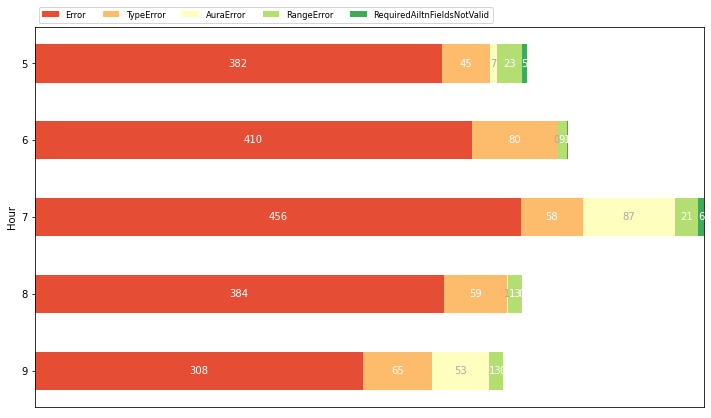

In [70]:
survey(result, top_error_types_by_peak_time_values)
plt.ylabel("Hour")
plt.show()

---

## Analyzing types of errors by day

Getting the intervals

In [71]:
list_of_unique_hour = lightning_error_group['TIMESTAMP_DERIVED_HOUR'].unique()

In [72]:
number_of_intervals = 6

In [73]:
intervals = []

initial = 0
for i in range(number_of_intervals):
    final = initial + (len(list_of_unique_hour)//number_of_intervals - 1)
    intervals.append(f"{initial}-{final}")
    initial = final + 1

In [74]:
intervals_dict = {}

for interval in intervals:
    interval_values = interval.split("-")
    intervals_dict[interval] = [i for i in range(int(interval_values[0]), int(interval_values[1]) + 1)]

Getting the result dictionary format

In [75]:
result = dictionary_format(top_error_types_by_day_values, intervals)

In [76]:
result

{'0-3': [0, 0, 0, 0, 0],
 '4-7': [0, 0, 0, 0, 0],
 '8-11': [0, 0, 0, 0, 0],
 '12-15': [0, 0, 0, 0, 0],
 '16-19': [0, 0, 0, 0, 0],
 '20-23': [0, 0, 0, 0, 0]}

Mapping the type of error to position

In [77]:
mapping_type_to_position(top_error_types_by_day_values)

In [78]:
map_types

{'Error': 0,
 'TypeError': 1,
 'AuraError': 3,
 'RangeError': 2,
 'RequiredAiltnFieldsNotValid': 4}

Getting the amount of errors for each type and time

In [79]:
def get_amount_intervals(list_types, list_of_all_types, intervals, intervals_dict):
    for unique_type in list_types:
        for i in range(len(list_of_all_types)):
            if list_of_all_types[i] == unique_type:
                for interval in intervals:
                    if list_of_hour[i] in intervals_dict[interval]:
                        result[interval][map_types[unique_type]] += list_of_ui_event_id_count[i]

In [80]:
get_amount_intervals(top_error_types_by_day_values, list_of_ui_event_source, intervals, intervals_dict)

In [81]:
result

{'0-3': [733, 51, 132, 0, 1],
 '4-7': [1464, 189, 59, 95, 14],
 '8-11': [969, 413, 26, 54, 1],
 '12-15': [313, 1033, 1, 16, 0],
 '16-19': [130, 949, 0, 4, 1],
 '20-23': [100, 486, 0, 2, 0]}

Viewing the data

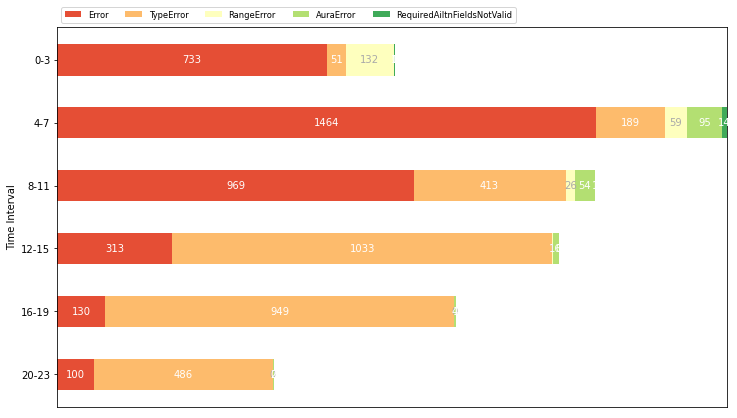

In [82]:
survey(result, top_error_types_by_day_values)
plt.ylabel("Time Interval")
plt.show()

---

## Analyzing the most common pages that generate more errors by day

Getting the count of erros for each page

In [83]:
lightning_error_group = lightning_error.groupby(['PAGE_ENTITY_TYPE']).agg({'UI_EVENT_ID': 'count'})

In [84]:
lightning_error_group.shape

(29, 1)

Renaming the column of ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [85]:
lightning_error_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

In [86]:
lightning_error_group

,UI_EVENT_ID_COUNT
PAGE_ENTITY_TYPE,
Account,4
Asset,83
Call_Transcript__c,184
Case,2260
Cases,2
Contact,42
ContentDocument,2
Dashboard,1
DispatchInstruction__c,6


Sorting the data by ***UI_EVENT_ID_COUNT***

In [87]:
lightning_error_group = lightning_error_group.sort_values(by=['UI_EVENT_ID_COUNT'], ascending=False)

In [88]:
lightning_error_group

,UI_EVENT_ID_COUNT
PAGE_ENTITY_TYPE,
DispatchPendingApproval__c,2271
Case,2260
WorkOrder,890
Report,372
Call_Transcript__c,184
Task,128
LiveChatTranscript,127
unknown,119
Asset,83


Viewing the data

Text(0.5, 1.0, 'Page Entity Type that appear the most during the day')

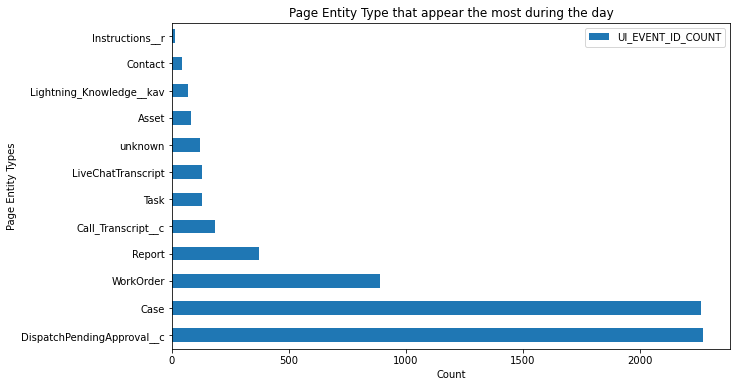

In [89]:
number_of_page_entity_type = 12

graph = lightning_error_group.head(number_of_page_entity_type).plot.barh(figsize=(10, 6))
graph.set_ylabel('Page Entity Types')
graph.set_xlabel('Count')
graph.set_title('Page Entity Type that appear the most during the day')

In [90]:
page_entity_types_above_1000 = len(lightning_error_group[lightning_error_group['UI_EVENT_ID_COUNT']>1000])
page_entity_types_above_100 = len(lightning_error_group[lightning_error_group['UI_EVENT_ID_COUNT']>100])
page_entity_types_below_10 = len(lightning_error_group[lightning_error_group['UI_EVENT_ID_COUNT']< 10])

print(f"""{page_entity_types_above_1000} type(s) of errors appear more than a thousand times
{page_entity_types_above_100 - page_entity_types_above_1000} type(s) appear between a hundred and a thousand times
The others appear less than a hundred times, being {page_entity_types_below_10} of them less than 10 times""")

2 type(s) of errors appear more than a thousand times
6 type(s) appear between a hundred and a thousand times
The others appear less than a hundred times, being 16 of them less than 10 times


### Getting top pages type by day

In [91]:
number_of_top_page_entity_type = 5

top_page_entity_type_by_day = lightning_error_group.head(number_of_top_page_entity_type)

In [92]:
top_page_entity_type_by_day

,UI_EVENT_ID_COUNT
PAGE_ENTITY_TYPE,
DispatchPendingApproval__c,2271
Case,2260
WorkOrder,890
Report,372
Call_Transcript__c,184


Reseting index

In [93]:
top_page_entity_type_by_day = top_page_entity_type_by_day.reset_index()

In [94]:
top_page_entity_type_by_day

,PAGE_ENTITY_TYPE,UI_EVENT_ID_COUNT
0,DispatchPendingApproval__c,2271
1,Case,2260
2,WorkOrder,890
3,Report,372
4,Call_Transcript__c,184


Result

In [95]:
top_page_entity_type_by_day_values = []

print(f"The top {number_of_top_page_entity_type} PAGE_ENTITY_TYPE by day are: ")

for i in top_page_entity_type_by_day.index:
    value = top_page_entity_type_by_day['PAGE_ENTITY_TYPE'][i]
    
    top_page_entity_type_by_day_values.append(value)
    
    print(f"{i + 1} - {value}")

The top 5 PAGE_ENTITY_TYPE by day are: 
1 - DispatchPendingApproval__c
2 - Case
3 - WorkOrder
4 - Report
5 - Call_Transcript__c


---

## Analyzing the most common pages that generate more errors by peak time

Grouping by ***PAGE_ENTITY_TYPE***

In [96]:
filtered_lightning_error_group = filtered_lightning_error.groupby(['PAGE_ENTITY_TYPE']).agg({'UI_EVENT_ID': 'count'})

In [97]:
filtered_lightning_error_group.shape

(16, 1)

In [98]:
filtered_lightning_error_group

,UI_EVENT_ID
PAGE_ENTITY_TYPE,
Account,1
Asset,17
Call_Transcript__c,12
Case,356
DispatchInstruction__c,3
DispatchPendingApproval__c,1256
Instructions__r,7
Lightning_Knowledge__ka,1
Lightning_Knowledge__kav,37


Renaming the column of ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [99]:
filtered_lightning_error_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

Sorting by ***UI_EVENT_ID_COUNT***

In [100]:
filtered_lightning_error_group_sorted = filtered_lightning_error_group.sort_values(by=['UI_EVENT_ID_COUNT'], ascending=False)

In [101]:
filtered_lightning_error_group_sorted

,UI_EVENT_ID_COUNT
PAGE_ENTITY_TYPE,
DispatchPendingApproval__c,1256
Case,356
WorkOrder,325
Report,164
LiveChatTranscript,52
Lightning_Knowledge__kav,37
Task,23
Asset,17
Call_Transcript__c,12


Viewing the data

Text(0.5, 1.0, 'Page Entity Type that appear the most during the peak time')

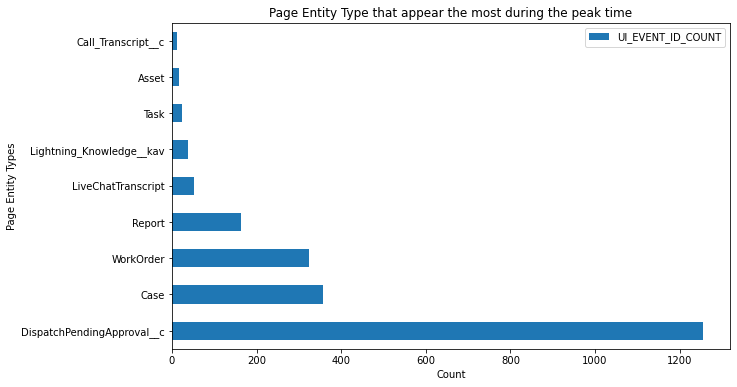

In [102]:
number_of_page_entity_type = 9

graph = filtered_lightning_error_group_sorted.head(number_of_page_entity_type).plot.barh(figsize=(10, 6))
graph.set_ylabel('Page Entity Types')
graph.set_xlabel('Count')
graph.set_title('Page Entity Type that appear the most during the peak time')

In [103]:
page_entity_types_above_1000 = len(filtered_lightning_error_group_sorted[filtered_lightning_error_group_sorted['UI_EVENT_ID_COUNT']>1000])
page_entity_types_above_100 = len(filtered_lightning_error_group_sorted[filtered_lightning_error_group_sorted['UI_EVENT_ID_COUNT']>100])
page_entity_types_below_10 = len(filtered_lightning_error_group_sorted[filtered_lightning_error_group_sorted['UI_EVENT_ID_COUNT']< 10])

print(f"""{page_entity_types_above_1000} type(s) of errors appear more than a thousand times
{page_entity_types_above_100 - page_entity_types_above_1000} type(s) appear between a hundred and a thousand times
The others appear less than a hundred times, being {page_entity_types_below_10} of them less than ten times""")

1 type(s) of errors appear more than a thousand times
3 type(s) appear between a hundred and a thousand times
The others appear less than a hundred times, being 7 of them less than ten times


### Getting top pages type by peak time

In [104]:
top_page_entity_type_by_peak_time = filtered_lightning_error_group_sorted.head(number_of_top_page_entity_type)

In [105]:
top_page_entity_type_by_peak_time

,UI_EVENT_ID_COUNT
PAGE_ENTITY_TYPE,
DispatchPendingApproval__c,1256
Case,356
WorkOrder,325
Report,164
LiveChatTranscript,52


Reseting index

In [106]:
top_page_entity_type_by_peak_time = top_page_entity_type_by_peak_time.reset_index()

In [107]:
top_page_entity_type_by_peak_time

,PAGE_ENTITY_TYPE,UI_EVENT_ID_COUNT
0,DispatchPendingApproval__c,1256
1,Case,356
2,WorkOrder,325
3,Report,164
4,LiveChatTranscript,52


Getting top page entity type values and showing result

In [108]:
top_page_entity_type_by_peak_time_values = []

print(f"The top {number_of_top_page_entity_type} PAGE_ENTITY_TYPE by peak time are: ")
for i in top_page_entity_type_by_peak_time.index:
    value = top_page_entity_type_by_peak_time['PAGE_ENTITY_TYPE'][i]
    
    top_page_entity_type_by_peak_time_values.append(value)
    print(f"{i + 1} - {value}")

The top 5 PAGE_ENTITY_TYPE by peak time are: 
1 - DispatchPendingApproval__c
2 - Case
3 - WorkOrder
4 - Report
5 - LiveChatTranscript


In [109]:
different = 0

for page_entity_type in top_page_entity_type_by_peak_time_values:
    if page_entity_type not in top_page_entity_type_by_day_values:
        different += 1

In [110]:
print(f"There are {different} diffent(s) type(s) of page relating to all day")

There are 1 diffent(s) type(s) of page relating to all day


---

## Analyzing peak time pages by hour

In [111]:
print(f"Filtering the data by top {number_of_top_page_entity_type} PAGE_ENTITY_TYPE")

Filtering the data by top 5 PAGE_ENTITY_TYPE


In [112]:
filtered_lightning_error = filtered_lightning_error[filtered_lightning_error.PAGE_ENTITY_TYPE
                                                    .isin(top_page_entity_type_by_peak_time_values)]

In [113]:
filtered_lightning_error.shape

(2153, 40)

Removing useless columns

In [114]:
filtered_lightning_error_simplified = filtered_lightning_error[['TIMESTAMP_DERIVED_HOUR', 'PAGE_ENTITY_TYPE']]

In [115]:
filtered_lightning_error_simplified

,TIMESTAMP_DERIVED_HOUR,PAGE_ENTITY_TYPE
1158,5,WorkOrder
1159,5,WorkOrder
1160,5,DispatchPendingApproval__c
1161,5,DispatchPendingApproval__c
1162,5,DispatchPendingApproval__c
...,...,...
3589,9,WorkOrder
3590,9,Case
3591,9,DispatchPendingApproval__c
3592,9,DispatchPendingApproval__c


Viewing erros by the hours

In [116]:
graph_data = filtered_lightning_error.pivot(columns='PAGE_ENTITY_TYPE', values='TIMESTAMP_DERIVED_HOUR')

In [117]:
graph_data.head()

PAGE_ENTITY_TYPE,Case,DispatchPendingApproval__c,LiveChatTranscript,Report,WorkOrder
1158,NaN,NaN,NaN,NaN,5.0
1159,NaN,NaN,NaN,NaN,5.0
1160,NaN,5.0,NaN,NaN,NaN
1161,NaN,5.0,NaN,NaN,NaN
1162,NaN,5.0,NaN,NaN,NaN


Text(0.5, 1.0, 'Density graph relating Page_Entity_Type and Hour')

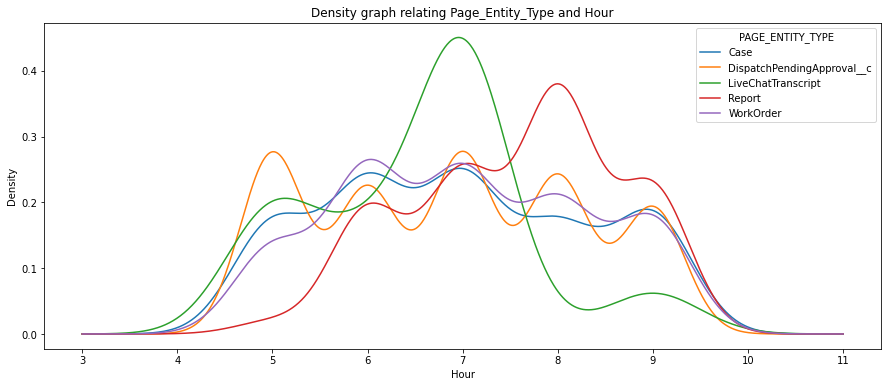

In [118]:
graph = graph_data.plot.kde(figsize=(15, 6))
graph.set_xlabel('Hour')
graph.set_title('Density graph relating Page_Entity_Type and Hour')

---

## Analyzing top peak time types of errors by page types

In [119]:
lightning_error_group = lightning_error.groupby(['PAGE_ENTITY_TYPE', 'UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [120]:
lightning_error_group

UI_EVENT_ID
PAGE_ENTITY_TYPE           UI_EVENT_SOURCE                         
Account                    Error                                  1
                           TypeError                              3
Asset                      Error                                  9
                           ReferenceError                         1
                           TypeError                             73
Call_Transcript__c         AuraError                              1
                           Error                                  9
                           RangeError                             2
                           TypeError                            172
Case                       Error                                245
                           RangeError                           172
                           RequiredAiltnFieldsNotValid           16
                           SyntaxError                            6
                           TypeError                           1819
                           unknown                                2
Cases                      TypeError                              2
Contact                    Error                                  2
                           RequiredAiltnFieldsNotValid            1
                           TypeError                             39
ContentDocument            TypeError                              2
Dashboard                  Error                                  1
DispatchInstruction__c     Error                                  5
                           TypeError                              1
DispatchPendingApproval__c Error                               2270
                           TypeError                              1
EmailMessage               TypeError                              4
EmailTemplate              TypeError                              1
Instructions__r            Error                                 11
                           TypeError                              2
Lightning_Knowledge__ka    Error                                  3
Lightning_Knowledge__kav   Error                                 51
                           TypeError                             18
LiveChatTranscript         AuraError                              2
                           Error                                 67
                           TypeError                             58
Order                      Error                                  2
Order_Products__r          Error                                  2
QuickText                  TypeError                              1
Report                     Error                                273
                           SecurityError                          1
                           TypeError                             98
ServiceAppointment         Error                                  2
Task                       Error                                 27
                           RangeError                            13
                           TypeError                             88
User                       Error                                  9
                           TypeError                              1
WorkOrder                  AuraError                              1
                           Error                                618
                           SyntaxError                            3
                           TypeError                            268
WorkOrders                 TypeError                              4
pse__Proj__c               Error                                  2
                           TypeError                              5
public_flowlog__r          TypeError                              2
public_flowlog__x          Error                                  1
                           TypeError                              1
unknown                    Error            

Reseting index

In [121]:
lightning_error_group = lightning_error_group.reset_index()

In [122]:
lightning_error_group.head()

,PAGE_ENTITY_TYPE,UI_EVENT_SOURCE,UI_EVENT_ID
0,Account,Error,1
1,Account,TypeError,3
2,Asset,Error,9
3,Asset,ReferenceError,1
4,Asset,TypeError,73


Getting the data for the visualization

In [123]:
list_of_page_entity_types = lightning_error_group['PAGE_ENTITY_TYPE'].tolist()
list_of_unique_ui_event_source = lightning_error_group['UI_EVENT_SOURCE'].unique()
list_of_ui_event_source = lightning_error_group['UI_EVENT_SOURCE'].tolist()
list_of_ui_event_id_count = lightning_error_group['UI_EVENT_ID'].tolist()

Getting the result dictionary format

In [124]:
result = dictionary_format(top_error_types_by_peak_time_values, top_page_entity_type_by_peak_time_values)

In [125]:
result

{'DispatchPendingApproval__c': [0, 0, 0, 0, 0],
 'Case': [0, 0, 0, 0, 0],
 'WorkOrder': [0, 0, 0, 0, 0],
 'Report': [0, 0, 0, 0, 0],
 'LiveChatTranscript': [0, 0, 0, 0, 0]}

Mapping the type of error to position

In [126]:
mapping_type_to_position(top_error_types_by_peak_time_values)

In [127]:
map_types

{'Error': 0,
 'TypeError': 1,
 'AuraError': 2,
 'RangeError': 3,
 'RequiredAiltnFieldsNotValid': 4}

Getting the amount of errors for each type and page

In [128]:
get_amount(top_error_types_by_peak_time_values, list_of_ui_event_source, top_page_entity_type_by_peak_time_values, list_of_page_entity_types)

In [129]:
result

{'DispatchPendingApproval__c': [2270, 1, 0, 0, 0],
 'Case': [245, 1819, 0, 172, 16],
 'WorkOrder': [618, 268, 1, 0, 0],
 'Report': [273, 98, 0, 0, 0],
 'LiveChatTranscript': [67, 58, 2, 0, 0]}

Viewing the data

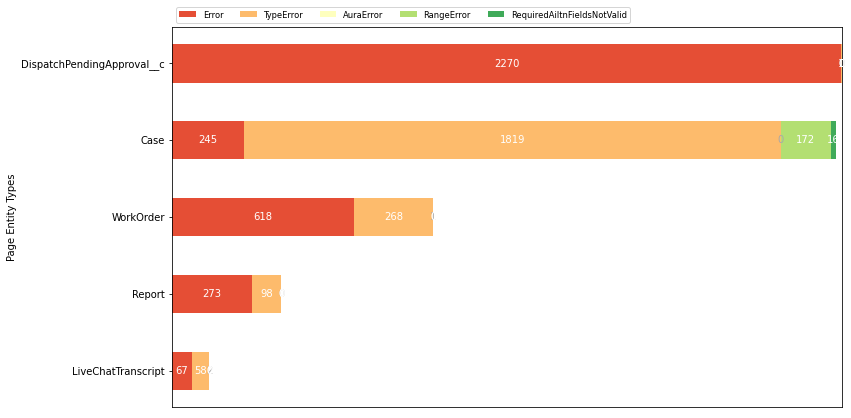

In [130]:
survey(result, top_error_types_by_peak_time_values)
plt.ylabel("Page Entity Types")
plt.show()

## Analyzing top all day types of errors by page types

Getting the result dictionary format

In [131]:
result = dictionary_format(top_error_types_by_day_values, top_page_entity_type_by_day_values)

In [132]:
result

{'DispatchPendingApproval__c': [0, 0, 0, 0, 0],
 'Case': [0, 0, 0, 0, 0],
 'WorkOrder': [0, 0, 0, 0, 0],
 'Report': [0, 0, 0, 0, 0],
 'Call_Transcript__c': [0, 0, 0, 0, 0]}

Mapping the type of error to position

In [133]:
mapping_type_to_position(top_error_types_by_day_values)

In [134]:
map_types

{'Error': 0,
 'TypeError': 1,
 'AuraError': 3,
 'RangeError': 2,
 'RequiredAiltnFieldsNotValid': 4}

Getting the amount of errors for each type and page

In [135]:
get_amount(top_error_types_by_day_values, list_of_ui_event_source, top_page_entity_type_by_day_values, list_of_page_entity_types)

In [136]:
result

{'DispatchPendingApproval__c': [2270, 1, 0, 0, 0],
 'Case': [245, 1819, 172, 0, 16],
 'WorkOrder': [618, 268, 0, 1, 0],
 'Report': [273, 98, 0, 0, 0],
 'Call_Transcript__c': [9, 172, 2, 1, 0]}

Viewing the data

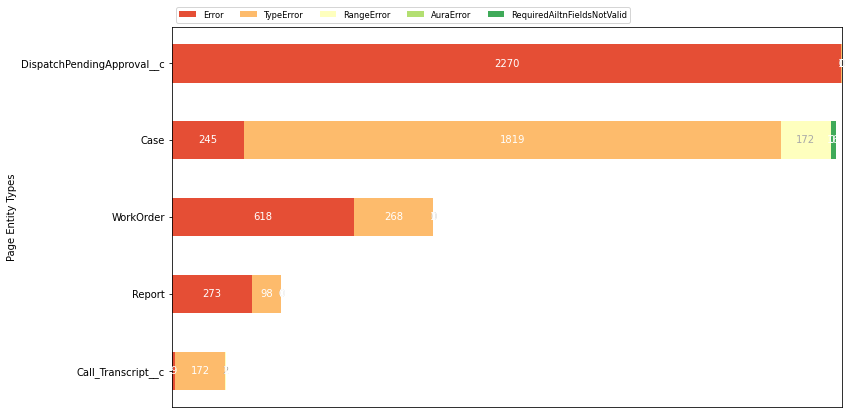

In [137]:
survey(result, top_error_types_by_day_values)
plt.ylabel('Page Entity Types')
plt.show()

---

## Analyzing the most common components that generate errors

Grouping ***PAGE_CONTEXT*** by the count of errors

In [138]:
lightning_error_group = lightning_error.groupby(['PAGE_CONTEXT']).agg({'UI_EVENT_ID': 'count'})

In [139]:
lightning_error_group

,UI_EVENT_ID
PAGE_CONTEXT,
desktopDashboards:dashboard,1
force:objectHomeDesktop,2579
force:relatedListDesktop,23
forceChatter:desktopChatter,9
forceChatter:feedElementFullView,1
forceKnowledge:articleRedirect,5
forceSearch:search,1
forceSearch:searchPageDesktop,87
home:landing,132


Sorting by ***UI_EVENT_ID*** count

In [140]:
lightning_error_group_sorted = lightning_error_group.sort_values(by=['UI_EVENT_ID'], ascending=False)

In [141]:
lightning_error_group_sorted

,UI_EVENT_ID
PAGE_CONTEXT,
force:objectHomeDesktop,2579
one:recordHomeFlexipage2Wrapper,2256
one:recordHomeFlexipage,1172
reports:reportBase,368
omni:supervisorPanel,236
unknown,133
home:landing,132
undefined,109
forceSearch:searchPageDesktop,87


Viewing the data

Text(0.5, 1.0, 'Components that appear the most during the day')

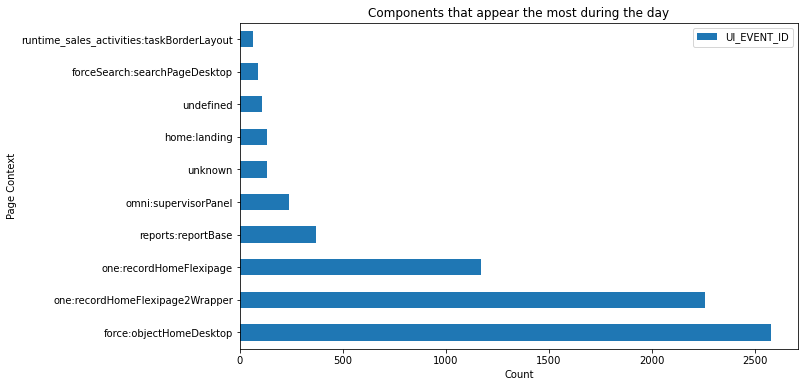

In [142]:
graph = lightning_error_group_sorted.head(10).plot.barh(figsize=(10, 6))
graph.set_ylabel('Page Context')
graph.set_xlabel('Count')
graph.set_title('Components that appear the most during the day')

### Getting top ***PAGE_CONTEXT***

In [143]:
number_of_page_context = 5

top_page_context = lightning_error_group_sorted.head(number_of_page_context)

In [144]:
top_page_context

,UI_EVENT_ID
PAGE_CONTEXT,
force:objectHomeDesktop,2579
one:recordHomeFlexipage2Wrapper,2256
one:recordHomeFlexipage,1172
reports:reportBase,368
omni:supervisorPanel,236


Reseting index

In [145]:
top_page_context = top_page_context.reset_index()

In [146]:
top_page_context

,PAGE_CONTEXT,UI_EVENT_ID
0,force:objectHomeDesktop,2579
1,one:recordHomeFlexipage2Wrapper,2256
2,one:recordHomeFlexipage,1172
3,reports:reportBase,368
4,omni:supervisorPanel,236


Result

In [147]:
top_page_context_values = []

print(f"The top {number_of_page_context} PAGE_CONTEXT are: ")
for i in top_page_context.index:
    value = top_page_context['PAGE_CONTEXT'][i]
    
    top_page_context_values.append(value)
    print(f"{i + 1} - {value}")

The top 5 PAGE_CONTEXT are: 
1 - force:objectHomeDesktop
2 - one:recordHomeFlexipage2Wrapper
3 - one:recordHomeFlexipage
4 - reports:reportBase
5 - omni:supervisorPanel


## Analyzing by peak time

Filtering by peak hours

In [148]:
filtered_lightning_error = lightning_error[lightning_error.TIMESTAMP_DERIVED_HOUR.isin(top_hours_values)]

Grouping ***PAGE_CONTEXT*** by the count of errors

In [149]:
filtered_lightning_error = filtered_lightning_error.groupby(['PAGE_CONTEXT']).agg({'UI_EVENT_ID': 'count'})

In [150]:
filtered_lightning_error

,UI_EVENT_ID
PAGE_CONTEXT,
force:objectHomeDesktop,1217
force:relatedListDesktop,7
forceKnowledge:articleRedirect,1
forceSearch:searchPageDesktop,24
home:landing,15
omni:supervisorPanel,178
one:auraContainer,4
one:recordActionWrapper,13
one:recordHomeFlexipage,435


Sorting by ***UI_EVENT_ID*** count

In [151]:
filtered_lightning_error = filtered_lightning_error.sort_values(by=['UI_EVENT_ID'], ascending=False)

In [152]:
filtered_lightning_error

,UI_EVENT_ID
PAGE_CONTEXT,
force:objectHomeDesktop,1217
one:recordHomeFlexipage,435
one:recordHomeFlexipage2Wrapper,420
omni:supervisorPanel,178
reports:reportBase,164
forceSearch:searchPageDesktop,24
home:landing,15
one:recordActionWrapper,13
force:relatedListDesktop,7


Viewing the data

Text(0.5, 1.0, 'Components that appear the most during the day')

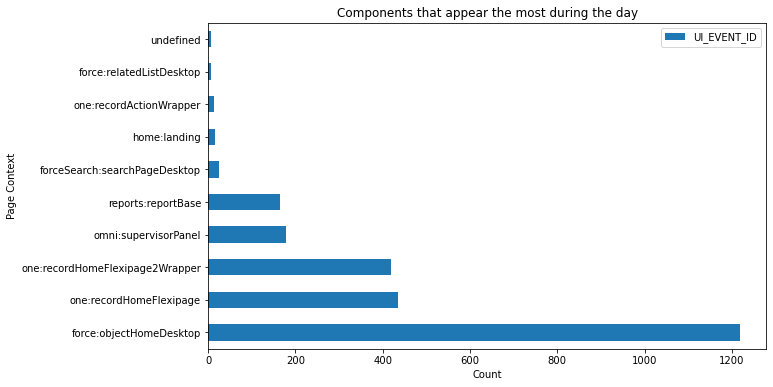

In [153]:
graph = filtered_lightning_error.head(10).plot.barh(figsize=(10, 6))
graph.set_ylabel('Page Context')
graph.set_xlabel('Count')
graph.set_title('Components that appear the most during the day')

## Analyzing PAGE_CONTEXT by hour

Grouping ***PAGE_CONTEXT*** and ***TIMESTAMP_DERIVED_HOUR*** by the count of errors

In [154]:
lightning_error_group = lightning_error.groupby(['PAGE_CONTEXT', 'TIMESTAMP_DERIVED_HOUR']).agg({'UI_EVENT_ID': 'count'})

Reseting index

In [155]:
lightning_error_group = lightning_error_group.reset_index()

In [156]:
lightning_error_group

,PAGE_CONTEXT,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID
0,desktopDashboards:dashboard,1,1
1,force:objectHomeDesktop,0,67
2,force:objectHomeDesktop,1,101
3,force:objectHomeDesktop,2,197
4,force:objectHomeDesktop,3,109
...,...,...,...
269,unknown,19,14
270,unknown,20,6
271,unknown,21,2
272,unknown,22,1


Getting the data for the visualization

In [157]:
list_of_hour = lightning_error_group['TIMESTAMP_DERIVED_HOUR'].tolist()
list_of_unique_hour = lightning_error_group['TIMESTAMP_DERIVED_HOUR'].unique()
list_of_unique_page_context = lightning_error_group['PAGE_CONTEXT'].unique()
list_of_page_context = lightning_error_group['PAGE_CONTEXT'].tolist()
list_of_ui_event_id_count = lightning_error_group['UI_EVENT_ID'].tolist()

Getting the result dictionary format

In [158]:
result = dictionary_format(top_page_context_values, top_hours_values)

In [159]:
result

{5: [0, 0, 0, 0, 0],
 6: [0, 0, 0, 0, 0],
 7: [0, 0, 0, 0, 0],
 8: [0, 0, 0, 0, 0],
 9: [0, 0, 0, 0, 0]}

Mapping the type of error to position

In [160]:
map_types = {}

In [161]:
mapping_type_to_position(top_page_context_values)

In [162]:
map_types

{'force:objectHomeDesktop': 0,
 'one:recordHomeFlexipage2Wrapper': 1,
 'one:recordHomeFlexipage': 2,
 'reports:reportBase': 3,
 'omni:supervisorPanel': 4}

Getting the amount of errors for each type and page

In [163]:
get_amount(top_page_context_values, list_of_page_context, top_hours_values, list_of_hour)

In [164]:
result

{5: [272, 83, 68, 3, 10],
 6: [231, 92, 112, 30, 11],
 7: [283, 90, 113, 38, 92],
 8: [245, 68, 76, 58, 8],
 9: [186, 87, 66, 35, 57]}

Viewing the data

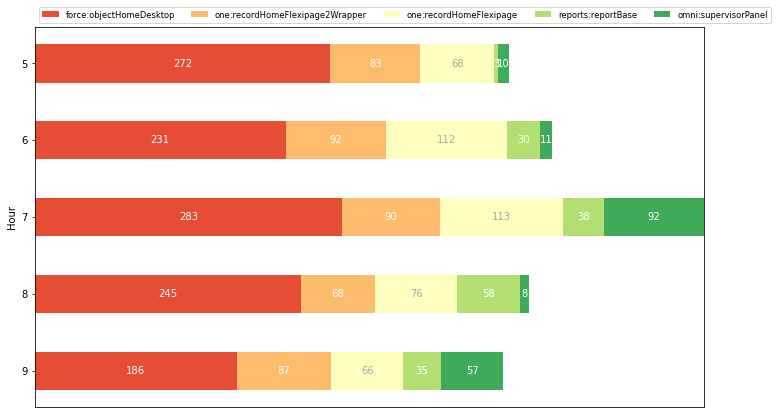

In [165]:
survey(result, top_page_context_values)
plt.ylabel("Hour")
plt.show()

### By day

Getting the result dictionary format

In [166]:
result = dictionary_format(top_page_context_values, intervals)

Mapping the type of error to position

In [167]:
mapping_type_to_position(top_page_context_values)

In [168]:
map_types

{'force:objectHomeDesktop': 0,
 'one:recordHomeFlexipage2Wrapper': 1,
 'one:recordHomeFlexipage': 2,
 'reports:reportBase': 3,
 'omni:supervisorPanel': 4}

Getting the amount of components for each time

In [169]:
# def get_amount_errors_intervals(list_types_of_erros, intervals, intervals_dict):
#     for unique_ui_event_source in list_types_of_erros:
#         for i in range(len(list_of_page_context)):
#             if list_of_page_context[i] == unique_ui_event_source:
#                 for interval in intervals:
#                     if list_of_hour[i] in intervals_dict[interval]:
#                         result[interval][map_types[unique_ui_event_source]] += list_of_ui_event_id_count[i]

In [170]:
# get_amount_errors_intervals(top_page_context_values, intervals, intervals_dict)
get_amount_intervals(top_page_context_values, list_of_page_context, intervals, intervals_dict)

Viewing the data

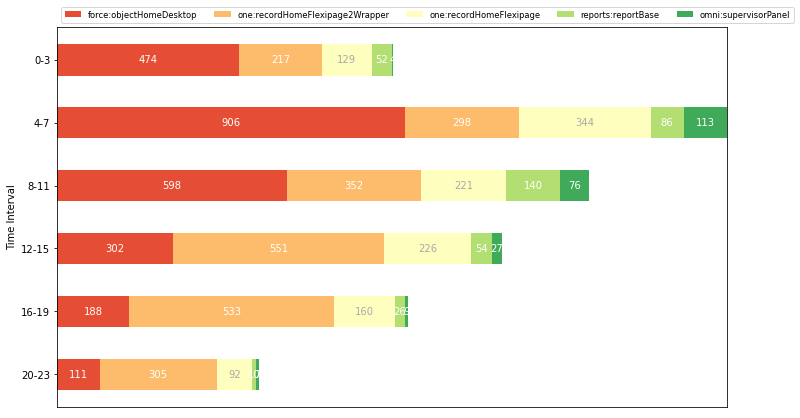

In [171]:
survey(result, top_page_context_values)
plt.ylabel("Time Interval")
plt.show()

---

## Components related to the most common errors

Grouping ***PAGE_CONTEXT*** and ***TIMESTAMP_DERIVED_HOUR*** by the count of errors

In [172]:
lightning_error_group = lightning_error.groupby(['PAGE_CONTEXT', 'UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

Reseting index

In [173]:
lightning_error_group = lightning_error_group.reset_index()

In [174]:
lightning_error_group

,PAGE_CONTEXT,UI_EVENT_SOURCE,UI_EVENT_ID
0,desktopDashboards:dashboard,Error,1
1,force:objectHomeDesktop,Error,2202
2,force:objectHomeDesktop,RangeError,8
3,force:objectHomeDesktop,TypeError,369
4,force:relatedListDesktop,Error,13
5,force:relatedListDesktop,TypeError,10
6,forceChatter:desktopChatter,Error,2
7,forceChatter:desktopChatter,TypeError,7
8,forceChatter:feedElementFullView,TypeError,1
9,forceKnowledge:articleRedirect,Error,4


Getting the data for the visualization

In [175]:
list_of_ui_event_source = lightning_error_group['UI_EVENT_SOURCE'].tolist()
list_of_page_context = lightning_error_group['PAGE_CONTEXT'].tolist()
list_of_ui_event_id_count = lightning_error_group['UI_EVENT_ID'].tolist()

Getting the result dictionary format

In [176]:
result = dictionary_format(top_error_types_by_day_values, top_page_context_values)

In [177]:
result

{'force:objectHomeDesktop': [0, 0, 0, 0, 0],
 'one:recordHomeFlexipage2Wrapper': [0, 0, 0, 0, 0],
 'one:recordHomeFlexipage': [0, 0, 0, 0, 0],
 'reports:reportBase': [0, 0, 0, 0, 0],
 'omni:supervisorPanel': [0, 0, 0, 0, 0]}

Mapping the type of error to position

In [178]:
map_types = {}

In [179]:
mapping_type_to_position(top_error_types_by_day_values)

In [180]:
map_types

{'Error': 0,
 'TypeError': 1,
 'RangeError': 2,
 'AuraError': 3,
 'RequiredAiltnFieldsNotValid': 4}

Getting the amount of errors for each component

In [181]:
get_amount(top_error_types_by_day_values, list_of_ui_event_source, top_page_context_values, list_of_page_context)

In [182]:
result

{'force:objectHomeDesktop': [2202, 369, 8, 0, 0],
 'one:recordHomeFlexipage2Wrapper': [340, 1741, 165, 1, 0],
 'one:recordHomeFlexipage': [775, 389, 2, 3, 0],
 'reports:reportBase': [273, 94, 0, 0, 0],
 'omni:supervisorPanel': [27, 43, 0, 166, 0]}

Viewing the data

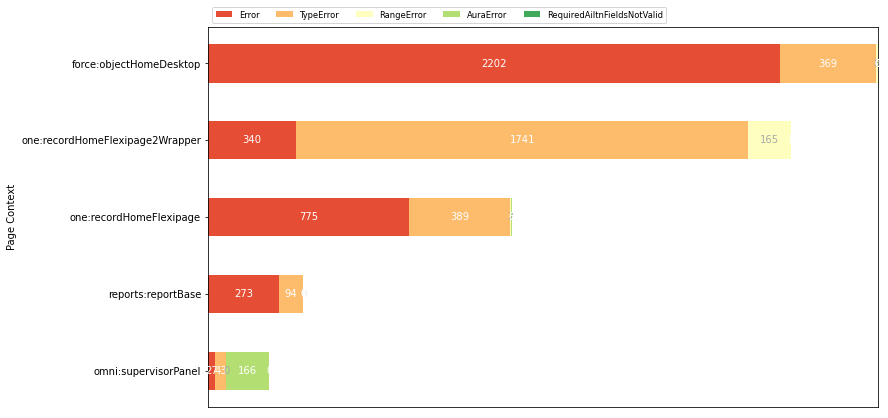

In [183]:
survey(result, top_error_types_by_day_values)
plt.ylabel("Page Context")
plt.show()